In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

In [2]:
# Load Data Directory
data_dir = 'E:/DataSet/sample-fruits-360'

In [3]:
# Function for load images
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [4]:
# Load Dataset
x, y, target_labels = load_dataset(data_dir)
print("Dataset Loaded !")

# Get Trainning size and Test size 
print('Total set size : ',x.shape)
print('Total targets : ',len(target_labels) )

Dataset Loaded !
Total set size :  (975,)
Total targets :  65


In [5]:
# Function for convert image to array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(file)))
    return images_as_array

# Convert images to numpy array using keras.preprocessing library
x = np.array(convert_image_to_array(x),np.float32)
print(x.shape)

(975, 100, 100, 3)


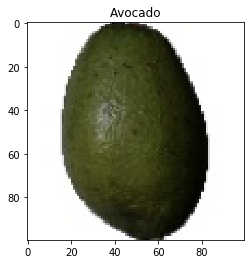

In [6]:
# Plot image on random data
plt.imshow(x[1]/255)
plt.title(target_labels[y[1]])
plt.show()

In [7]:
# Flatten the features of image
x = x.reshape([-1,100*100*3])
x = x/255
print("final shape : " , x.shape)

final shape :  (975, 30000)


In [8]:
# Train and Test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=74)

# Get size of all set
print("X Train size : ", X_train.shape)
print("X Test size : ", X_test.shape)
print("Y Train size : ", y_train.shape)
print("Y Test size : ", y_test.shape)

X Train size :  (780, 30000)
X Test size :  (195, 30000)
Y Train size :  (780,)
Y Test size :  (195,)


In [9]:
# Convert numpy array to torch
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [10]:
# Define no of iteration, batch size, num_epochs
batch_size=100
n_iters = 1000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

In [11]:
# Set train and test
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

### ANN model for 3 hidden layer

In [12]:
# Create ANN Model with 3 hidden layer
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh3 = nn.Tanh()
        
        self.fc4 = nn.Linear(hidden_dim,hidden_dim)
        self.relu4 = nn.ReLU() 
        
        self.fc5 =  nn.Linear(hidden_dim,output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.tanh3(out)
        
        out = self.fc4(out)
        out = self.relu4(out)

        out = self.fc5(out)
        return out

In [13]:
# Initialize Parameters and fit the model
input_dim = 100*100*3
hidden_dim = 300
output_dim = len(target_labels)

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 100*100*3))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 5 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 100*100*3))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            if count % 50 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.080074310302734  Accuracy: 21.538461685180664 %
Iteration: 100  Loss: 3.966670274734497  Accuracy: 21.0256404876709 %
Iteration: 150  Loss: 3.666745901107788  Accuracy: 18.461538314819336 %
Iteration: 200  Loss: 3.3791415691375732  Accuracy: 14.871794700622559 %
Iteration: 250  Loss: 2.9278512001037598  Accuracy: 23.076923370361328 %
Iteration: 300  Loss: 2.4823861122131348  Accuracy: 34.35897445678711 %
Iteration: 350  Loss: 1.991461992263794  Accuracy: 49.230770111083984 %
Iteration: 400  Loss: 1.8377304077148438  Accuracy: 40.0 %
Iteration: 450  Loss: 1.314530611038208  Accuracy: 73.33333587646484 %
Iteration: 500  Loss: 1.0879533290863037  Accuracy: 88.20513153076172 %
Iteration: 550  Loss: 0.9156235456466675  Accuracy: 86.15384674072266 %
Iteration: 600  Loss: 0.699239194393158  Accuracy: 95.8974380493164 %
Iteration: 650  Loss: 0.5002990961074829  Accuracy: 98.97435760498047 %
Iteration: 700  Loss: 0.4570555090904236  Accuracy: 98.46154022216797 %
Iteration

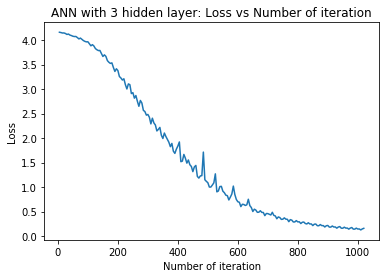

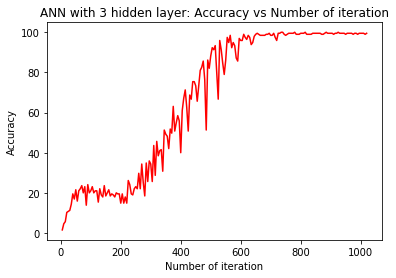

In [15]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN with 3 hidden layer: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN with 3 hidden layer: Accuracy vs Number of iteration")
plt.show()

### ANN model for 5 hidden layer

In [16]:
# Create ANN Model with 5 hidden layer 
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh3 = nn.Tanh()
        
        self.fc4 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh4 = nn.Tanh() 
         
        self.fc5 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh5 = nn.Tanh() 
         
        self.fc6 = nn.Linear(hidden_dim,hidden_dim)
        self.relu6 = nn.ReLU() 
        
        self.fc7 =  nn.Linear(hidden_dim,output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        out = self.tanh3(out)
        
        out = self.fc4(out)
        out = self.tanh4(out)
        
        out = self.fc5(out)
        out = self.tanh5(out)
        
        out = self.fc6(out)
        out = self.relu6(out)

        out = self.fc7(out)
        return out

In [17]:
# Initialize Parameters and fit the model
input_dim = 100*100*3
hidden_dim = 300
output_dim = len(target_labels)

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [18]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 100*100*3))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 5 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 100*100*3))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            if count % 50 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.172045707702637  Accuracy: 5.128205299377441 %
Iteration: 100  Loss: 4.166314601898193  Accuracy: 5.128205299377441 %
Iteration: 150  Loss: 4.153072357177734  Accuracy: 8.20512866973877 %
Iteration: 200  Loss: 4.136241912841797  Accuracy: 9.230769157409668 %
Iteration: 250  Loss: 4.12152624130249  Accuracy: 8.717948913574219 %
Iteration: 300  Loss: 4.0943498611450195  Accuracy: 10.769230842590332 %
Iteration: 350  Loss: 4.016507625579834  Accuracy: 11.282051086425781 %
Iteration: 400  Loss: 3.8978209495544434  Accuracy: 10.769230842590332 %
Iteration: 450  Loss: 3.648564100265503  Accuracy: 12.820512771606445 %
Iteration: 500  Loss: 3.378490686416626  Accuracy: 12.307692527770996 %
Iteration: 550  Loss: 3.168192148208618  Accuracy: 13.333333015441895 %
Iteration: 600  Loss: 2.7548561096191406  Accuracy: 9.743589401245117 %
Iteration: 650  Loss: 2.369915246963501  Accuracy: 18.9743595123291 %
Iteration: 700  Loss: 2.0842933654785156  Accuracy: 25.64102554321289 %


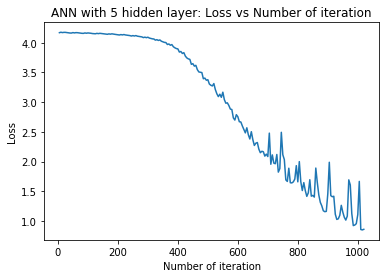

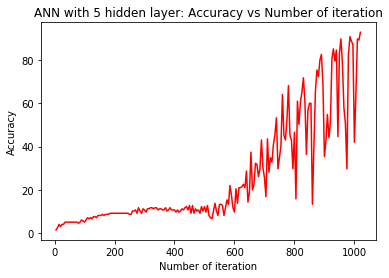

In [19]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN with 5 hidden layer: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN with 5 hidden layer: Accuracy vs Number of iteration")
plt.show()

#### Increase number of layers in ANN , keeping other all parameteres as it is, it performs with less accuracy and degrade the performance of model in my case.